In [2]:
# importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import *
from math import sqrt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# getting data from the csv file
data = pd.read_csv('Mod_Data_csv_edit_category.csv')
data.head()

,episode_number,pitch_number,brand_name,idea,Category,Male_rating,Female_rating,deal,pitcher_ask_amount,ask_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,4,2.93750,2.93750,1,50.0,5.0,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,2,3.71875,3.43750,1,40.0,15.0,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,8,3.03125,2.93750,1,25.0,10.0,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,4,3.40625,3.31250,1,70.0,1.0,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,3,3.65625,3.34375,0,50.0,5.0,...,0,0,0,0,0,0,0,0,0.0,0.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   episode_number         117 non-null    int64  
 1   pitch_number           117 non-null    int64  
 2   brand_name             117 non-null    object 
 3   idea                   117 non-null    object 
 4   Category               117 non-null    int64  
 5   Male_rating            114 non-null    float64
 6   Female_rating          114 non-null    float64
 7   deal                   117 non-null    int64  
 8   pitcher_ask_amount     117 non-null    float64
 9   ask_equity             117 non-null    float64
 10  ask_valuation          117 non-null    float64
 11  deal_amount            117 non-null    float64
 12  deal_equity            117 non-null    float64
 13  deal_valuation         117 non-null    float64
 14  ashneer_present        117 non-null    int64  
 15  anupam

In [5]:
data.describe()

,episode_number,pitch_number,Category,Male_rating,Female_rating,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
count,117.000000,117.000000,117.000000,114.000000,114.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,18.735043,59.000000,5.051282,3.435015,3.387804,0.555556,319.854709,5.188034,3852.462479,31.982915,...,0.179487,0.205128,0.239316,0.188034,0.128205,0.230769,0.059829,1.230769,18.132481,5.583590
std,10.070778,33.919021,2.635455,0.504219,0.438829,0.499041,2767.842777,3.892121,11931.601957,36.687391,...,0.385410,0.405532,0.428501,0.392420,0.335756,0.423137,0.238190,1.410457,23.588682,10.803799
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.001010,0.250000,0.010000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,30.000000,4.000000,3.195312,3.250000,0.000000,45.000000,2.500000,666.670000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,59.000000,4.000000,3.562500,3.468750,1.000000,50.000000,5.000000,1250.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.250000
75%,27.000000,88.000000,8.000000,3.750000,3.625000,1.000000,80.000000,7.500000,2857.140000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,25.000000,6.000000
max,35.000000,117.000000,10.000000,4.343750,4.062500,1.000000,30000.000000,25.000000,120000.000000,150.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,100.000000,75.000000


In [6]:
# finding null values in all the columns
data.isnull().sum()

episode_number           0
pitch_number             0
brand_name               0
idea                     0
Category                 0
Male_rating              3
Female_rating            3
deal                     0
pitcher_ask_amount       0
ask_equity               0
ask_valuation            0
deal_amount              0
deal_equity              0
deal_valuation           0
ashneer_present          0
anupam_present           0
aman_present             0
namita_present           0
vineeta_present          0
peyush_present           0
ghazal_present           0
ashneer_deal             0
anupam_deal              0
aman_deal                0
namita_deal              0
vineeta_deal             0
peyush_deal              0
ghazal_deal              0
total_sharks_invested    0
amount_per_shark         0
equity_per_shark         0
dtype: int64

In [7]:
# determing strategy for filling missing values
print(data.Male_rating.mean())
print(data.Male_rating.median())
print(data.Male_rating.mode())

3.4350152093947366
3.5625
0    3.59375
Name: Male_rating, dtype: float64


In [8]:
print(data.Female_rating.mean())
print(data.Female_rating.median())
print(data.Female_rating.mode())

3.3878041878947367
3.46875
0    3.5
Name: Female_rating, dtype: float64


In [9]:
# filling the values in columns having missing values with decided strategy
data['Male_rating'] = data['Male_rating'].fillna(data['Male_rating'].mean())
data['Female_rating'] = data['Female_rating'].fillna(data['Female_rating'].mean())
data

,episode_number,pitch_number,brand_name,idea,Category,Male_rating,Female_rating,deal,pitcher_ask_amount,ask_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,4,2.93750,2.937500,1,50.0,5.0,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,2,3.71875,3.437500,1,40.0,15.0,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,8,3.03125,2.937500,1,25.0,10.0,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,4,3.40625,3.312500,1,70.0,1.0,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,3,3.65625,3.343750,0,50.0,5.0,...,0,0,0,0,0,0,0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,34,113,Green Protein,Plant-Based Protein,4,3.78125,3.468750,0,60.0,2.0,...,0,0,0,0,0,0,0,0,0.0,0.000000
113,34,114,On2Cook,Fastest Cooking Device,4,3.40625,3.093750,0,100.0,1.0,...,0,0,0,0,0,0,0,0,0.0,0.000000
114,35,115,Jain Shikanji,Lemonade,4,3.00000,3.593750,1,40.0,8.0,...,1,1,1,0,1,0,0,4,10.0,7.500000
115,35,116,Woloo,Washroom Finder,7,3.90625,3.677419,0,50.0,4.0,...,0,0,0,0,0,0,0,0,0.0,0.000000


<AxesSubplot:>

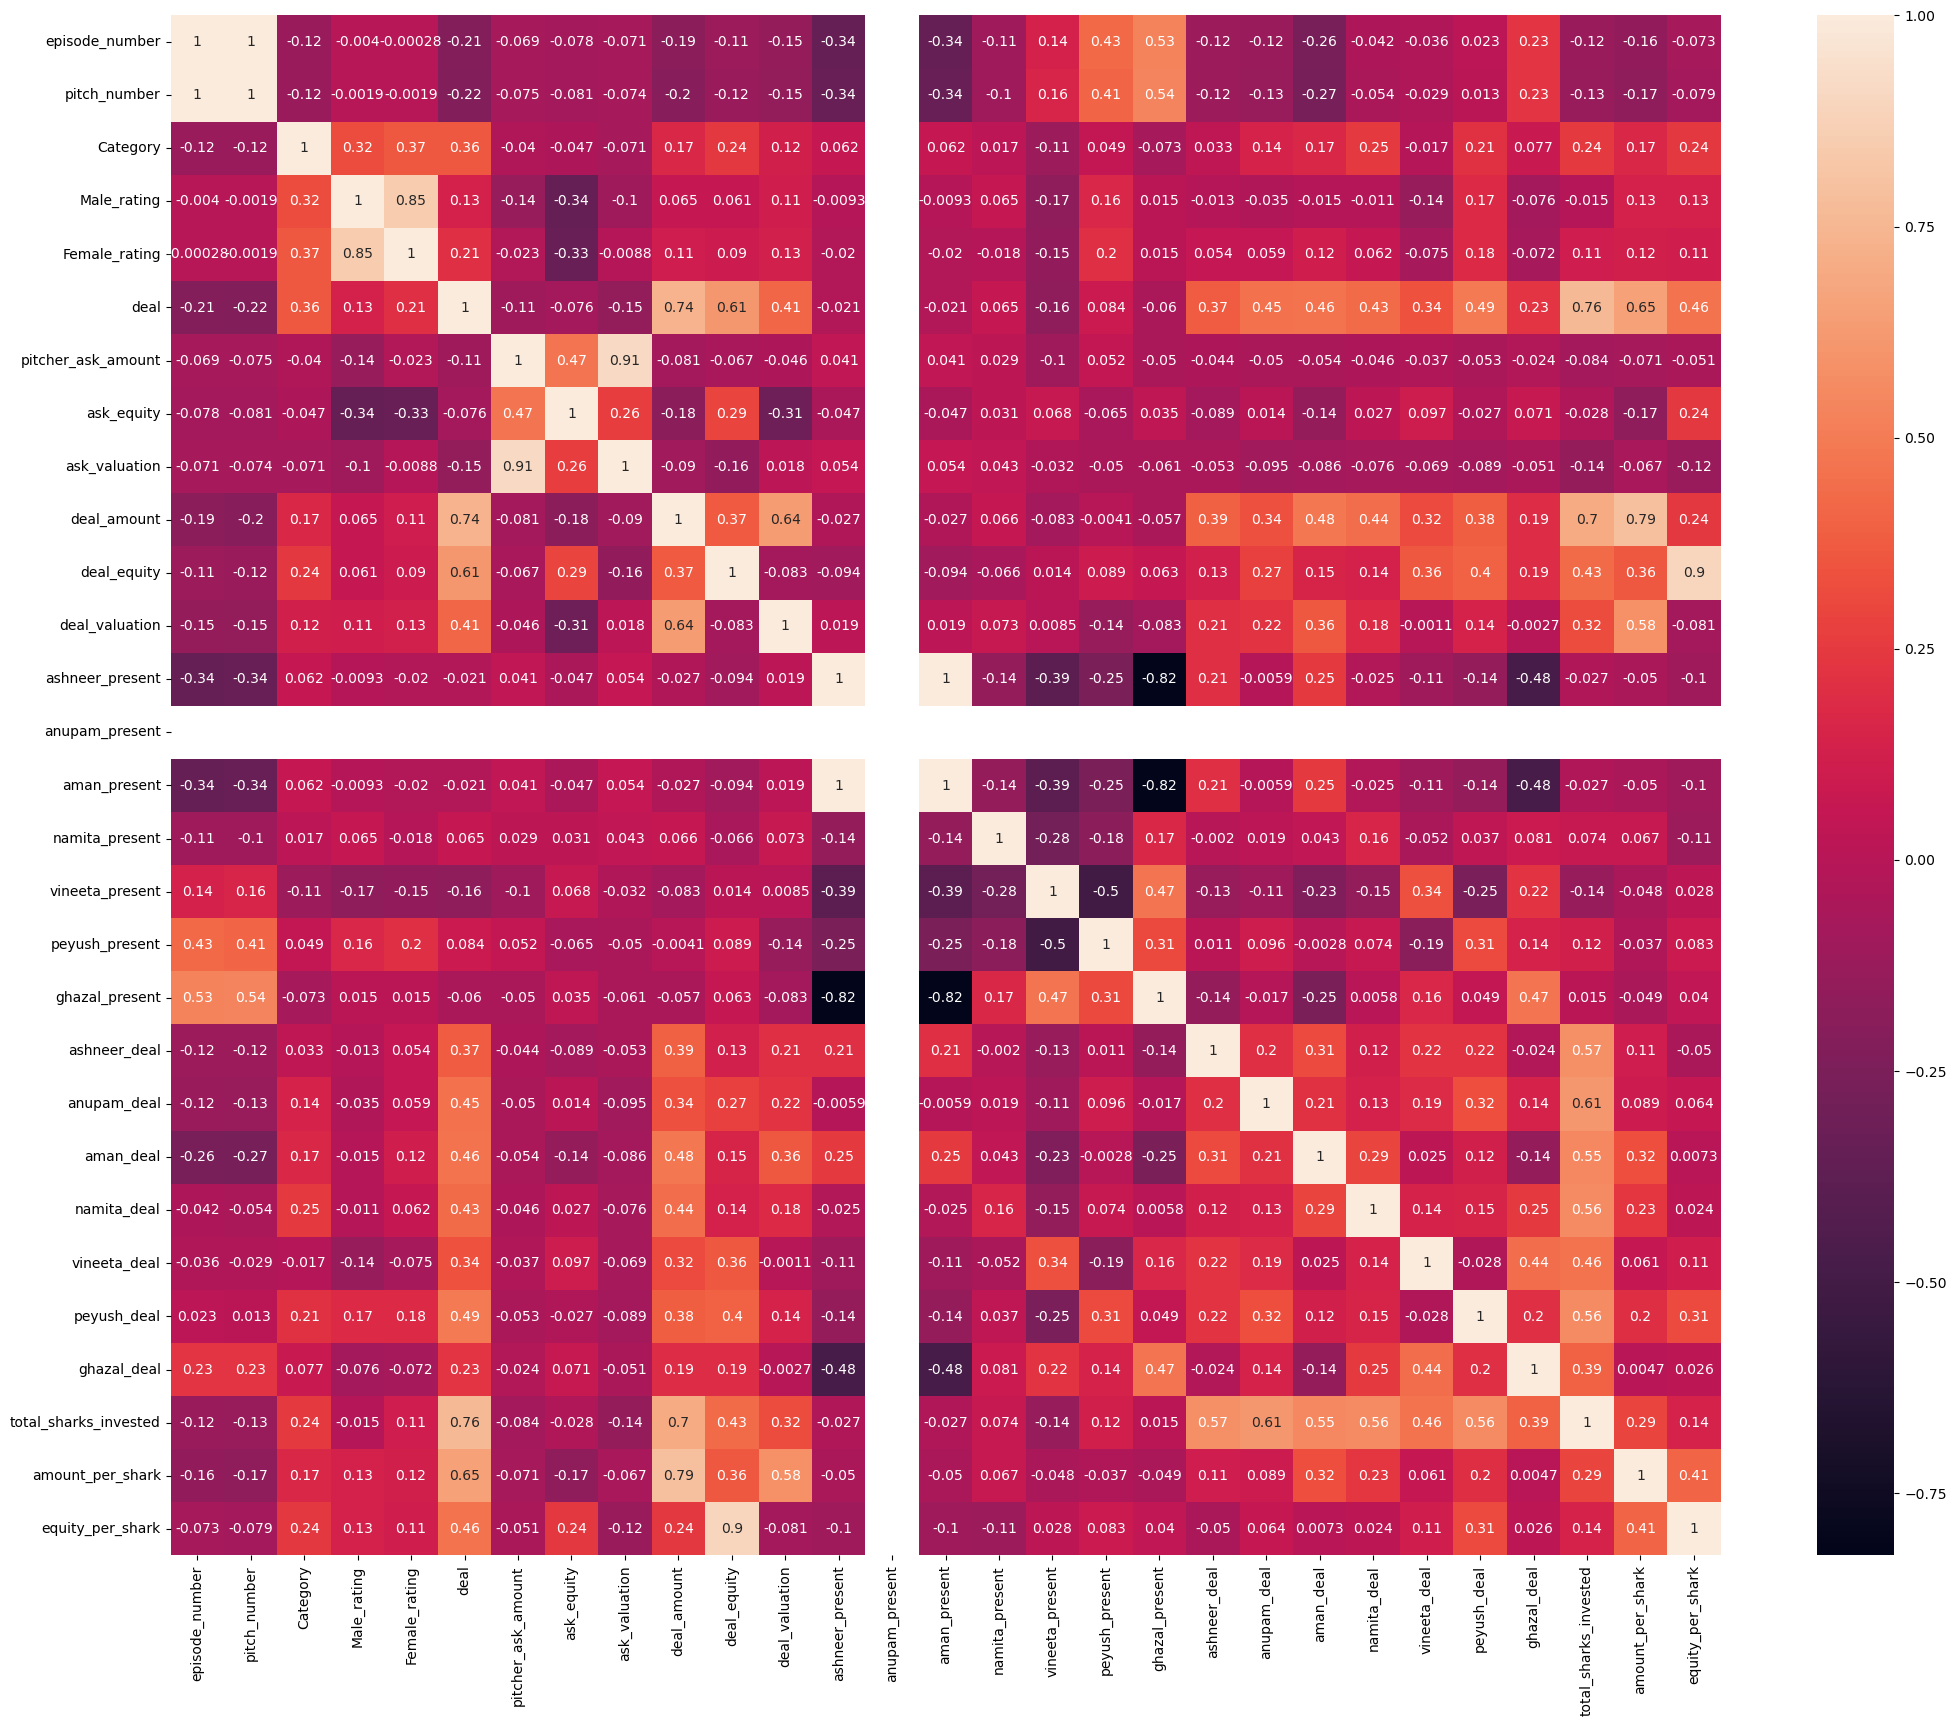

In [10]:
# heatmap depicting the correlation between all the columns
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(), annot = True)

In [11]:
print(data.skew())
print(data.kurt())

episode_number           -0.093936
pitch_number              0.000000
Category                  0.187838
Male_rating              -2.124735
Female_rating            -2.930791
deal                     -0.226521
pitcher_ask_amount       10.813586
ask_equity                1.945516
ask_valuation             8.425035
deal_amount               0.837652
deal_equity               2.109755
deal_valuation            3.639643
ashneer_present          -1.854647
anupam_present            0.000000
aman_present             -1.854647
namita_present           -2.818373
vineeta_present          -0.261914
peyush_present           -1.183139
ghazal_present            1.353724
ashneer_deal              1.692155
anupam_deal               1.479538
aman_deal                 1.237884
namita_deal               1.617610
vineeta_deal              2.253189
peyush_deal               1.294677
ghazal_deal               3.760243
total_sharks_invested     0.968345
amount_per_shark          1.458489
equity_per_shark    

C:\Users\Admin\AppData\Local\Temp\ipykernel_19568\3676912286.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.skew())
C:\Users\Admin\AppData\Local\Temp\ipykernel_19568\3676912286.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.kurt())


In [12]:
#sns.pairplot(data, hue = 'deal')

In [13]:
# dropping unnecessary columns from the dataframe
data = data.drop(['idea','brand_name','episode_number','pitch_number'], axis=1)
data.head()

,Category,Male_rating,Female_rating,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,4,2.93750,2.93750,1,50.0,5.0,1000.00,75.0,16.00,468.75,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,2,3.71875,3.43750,1,40.0,15.0,266.67,40.0,50.00,80.00,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,8,3.03125,2.93750,1,25.0,10.0,250.00,25.0,30.00,83.33,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,4,3.40625,3.31250,1,70.0,1.0,7000.00,70.0,2.75,2545.45,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,3,3.65625,3.34375,0,50.0,5.0,1000.00,0.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000


In [14]:
data.isnull().sum()

Category                 0
Male_rating              0
Female_rating            0
deal                     0
pitcher_ask_amount       0
ask_equity               0
ask_valuation            0
deal_amount              0
deal_equity              0
deal_valuation           0
ashneer_present          0
anupam_present           0
aman_present             0
namita_present           0
vineeta_present          0
peyush_present           0
ghazal_present           0
ashneer_deal             0
anupam_deal              0
aman_deal                0
namita_deal              0
vineeta_deal             0
peyush_deal              0
ghazal_deal              0
total_sharks_invested    0
amount_per_shark         0
equity_per_shark         0
dtype: int64

In [15]:
# defining the independent and dependent parameters
X = data.drop(['deal','deal_amount','deal_equity','deal_valuation','ashneer_deal','anupam_deal','aman_deal','namita_deal','vineeta_deal','peyush_deal','ghazal_deal','total_sharks_invested','equity_per_shark','amount_per_shark','anupam_present'], axis=1)
y = data['deal']
y = np.array(y)
y = y.astype(int)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X, y

(     Category  Male_rating  Female_rating  pitcher_ask_amount  ask_equity  \
 0           4      2.93750       2.937500                50.0         5.0   
 1           2      3.71875       3.437500                40.0        15.0   
 2           8      3.03125       2.937500                25.0        10.0   
 3           4      3.40625       3.312500                70.0         1.0   
 4           3      3.65625       3.343750                50.0         5.0   
 ..        ...          ...            ...                 ...         ...   
 112         4      3.78125       3.468750                60.0         2.0   
 113         4      3.40625       3.093750               100.0         1.0   
 114         4      3.00000       3.593750                40.0         8.0   
 115         7      3.90625       3.677419                50.0         4.0   
 116         2      4.09375       3.875000               100.0         2.5   
 
      ask_valuation  ashneer_present  aman_present  namita_pre

<AxesSubplot:>

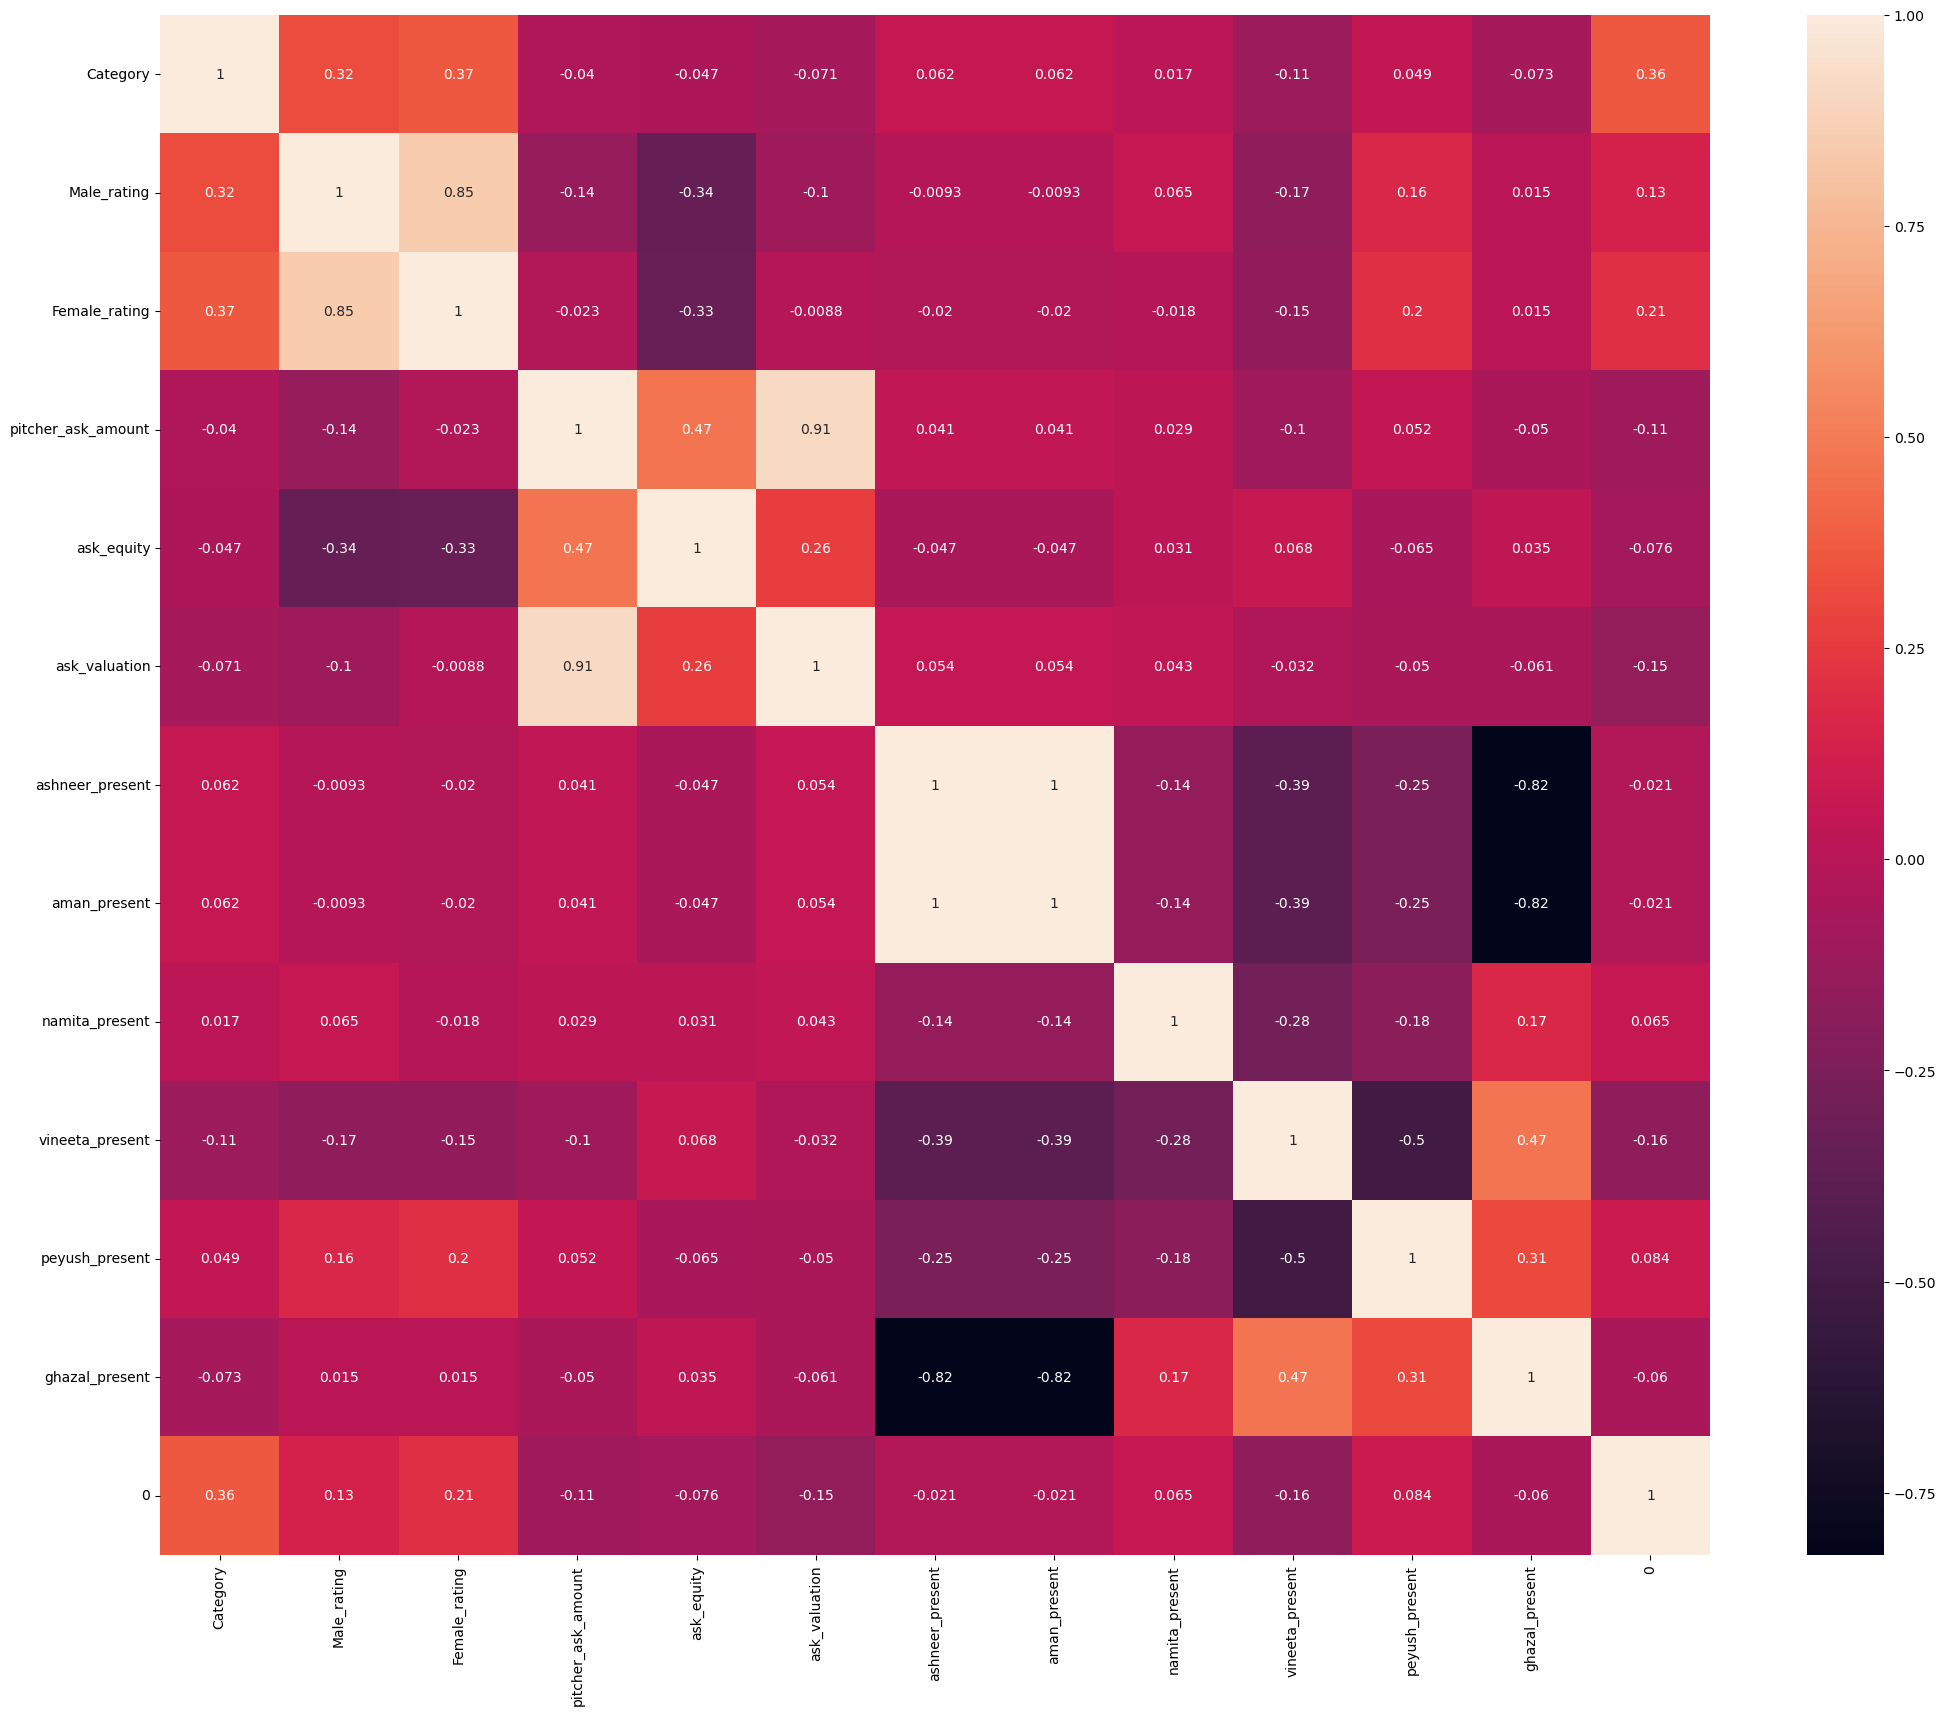

In [16]:
# heatmap depicting correlation between selected parameters
mod = pd.concat([X,y],axis=1)
plt.figure(figsize=(25,20))
sns.heatmap(mod.corr(), annot = True)

In [17]:
# splitting the data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,shuffle=False)

In [18]:
#x_val, x_test, y_val, y_test = train_test_split(x_test,y_test, test_size = 0.5,shuffle=False)

In [19]:
# standardization of the independent variables inorder to improve the performance of model
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
# creating the neural network model
model = Sequential()
model.add(Dense(30, input_dim=12,kernel_initializer = 'uniform', activation = 'softsign'))
model.add(Dense(15,kernel_initializer = 'uniform', activation = 'sigmoid'))
model.add(Dense(20,kernel_initializer = 'uniform', activation = 'softplus'))
model.add(Dense(1,kernel_initializer = 'uniform', activation = 'sigmoid'))

In [21]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# executing the model training
model.fit(x_train, y_train, epochs=100, verbose=1,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 108ms/step - loss: 0.7124 - accuracy: 0.3478 - val_loss: 0.6894 - val_accuracy: 0.5556
Epoch 2/100
3/3 [==============================] - 0s 24ms/step - loss: 0.7049 - accuracy: 0.3478 - val_loss: 0.6912 - val_accuracy: 0.5556
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6988 - accuracy: 0.3478 - val_loss: 0.6931 - val_accuracy: 0.5556
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.4783 - val_loss: 0.6947 - val_accuracy: 0.4444
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6886 - accuracy: 0.6522 - val_loss: 0.6964 - val_accuracy: 0.4444
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 0.6850 - accuracy: 0.6522 - val_loss: 0.6985 - val_accuracy: 0.4444
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6809 - accuracy: 0.6522 - val_loss: 0.7010 - val_accuracy: 0.4444
Epoch 8/100
3/3 [==

In [23]:
# defining the standard ML models for comparison
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)
model_rf = RandomForestClassifier(n_estimators = 250)
model_rf.fit(x_train,y_train)
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19568\2257807439.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train,y_train)


DecisionTreeClassifier()

In [24]:
# execting and getting the prediction 
y_pred_lr = model_lr.predict(x_test)
y_pred_rf = model_rf.predict(x_test)
y_pred_dt = model_dt.predict(x_test)
y_pred_ann = model.predict(x_test)

1/1 [==============================] - 0s 102ms/step


In [25]:
# optimizing ANN results to restrict those into integers, 0 and 1
tmp = sum(y_pred_ann) / len(y_pred_ann)
rect_answer = []
for i in y_pred_ann:
    if i < tmp:
        rect_answer.append(0)
    else:
        rect_answer.append(1)
print(rect_answer)
y_pred_ann = rect_answer

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]


In [26]:
# comparison of results
y_pred_lr = np.array(y_pred_lr)
y_pred_rf = np.array(y_pred_rf)
y_pred_dt = np.array(y_pred_dt)
y_pred_ann = np.array(y_pred_ann)
y_test = np.array(y_test)
print("Original test values \t | Linear Regression \t | Random Forest \t | Decision Tree \t | ANN Model")
print("------------------------------------------------------------------------------------------------------------")
for j in range(len(y_test)):
    print(y_test[j],'\t\t\t | ',y_pred_lr[j],'\t\t\t | ',y_pred_rf[j],'\t\t\t | ',y_pred_dt[j],'\t\t\t | ',y_pred_ann[j])

Original test values 	 | Linear Regression 	 | Random Forest 	 | Decision Tree 	 | ANN Model
------------------------------------------------------------------------------------------------------------
[1] 			 |  0 			 |  0 			 |  0 			 |  0
[1] 			 |  0 			 |  1 			 |  0 			 |  0
[0] 			 |  1 			 |  0 			 |  0 			 |  0
[1] 			 |  1 			 |  0 			 |  1 			 |  1
[1] 			 |  0 			 |  1 			 |  1 			 |  0
[0] 			 |  0 			 |  1 			 |  0 			 |  0
[0] 			 |  0 			 |  0 			 |  0 			 |  0
[0] 			 |  0 			 |  0 			 |  0 			 |  0
[1] 			 |  0 			 |  0 			 |  1 			 |  0
[0] 			 |  0 			 |  0 			 |  0 			 |  0
[0] 			 |  1 			 |  1 			 |  0 			 |  0
[0] 			 |  0 			 |  1 			 |  0 			 |  0
[0] 			 |  1 			 |  1 			 |  1 			 |  0
[1] 			 |  1 			 |  1 			 |  1 			 |  1
[0] 			 |  1 			 |  1 			 |  1 			 |  1
[0] 			 |  1 			 |  1 			 |  1 			 |  1
[0] 			 |  0 			 |  1 			 |  1 			 |  0
[1] 			 |  1 			 |  1 			 |  1 			 |  0
[0] 			 |  1 			 |  1 			 |  1 			 |  1
[1] 			 |  1 			 |  1 			 |  1 			 |  

In [27]:
y_test_1 = []
print(y_test.shape)
for i in range(len(y_test)):
    y_test_1.append(y_test[i][0])

(30, 1)


In [28]:
# extracting results in the excel sheet
result = pd.DataFrame({'Expected': y_test_1, 'Prediction - Logistic Regression': y_pred_lr, 
                       'Prediction - Random Forest': y_pred_rf, 'Prediction - Decision Tree': y_pred_dt, 
                       'Prediction - Our Model (ANN)': y_pred_ann})
result

,Expected,Prediction - Logistic Regression,Prediction - Random Forest,Prediction - Decision Tree,Prediction - Our Model (ANN)
0,1,0,0,0,0
1,1,0,1,0,0
2,0,1,0,0,0
3,1,1,0,1,1
4,1,0,1,1,0
5,0,0,1,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,1,0,0,1,0
9,0,0,0,0,0


In [29]:
result.to_excel("Results_P1_75-25.xlsx")

In [30]:
# function to get the confusion matrix
def c_m(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, square=True, cmap='Blues', fmt='d', cbar=False)
    plt.title("Confusion Matrix")
    plt.show()

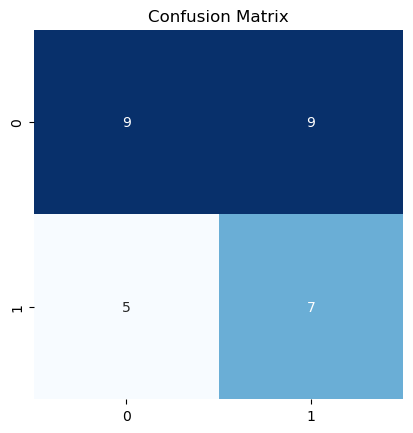

In [31]:
# For Logistic Regression
c_m(y_test, y_pred_lr)

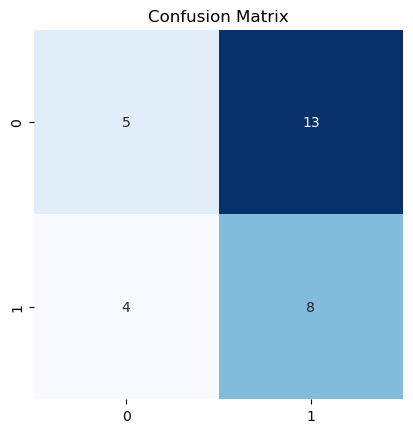

In [32]:
# For Random Forest
c_m(y_test, y_pred_rf)

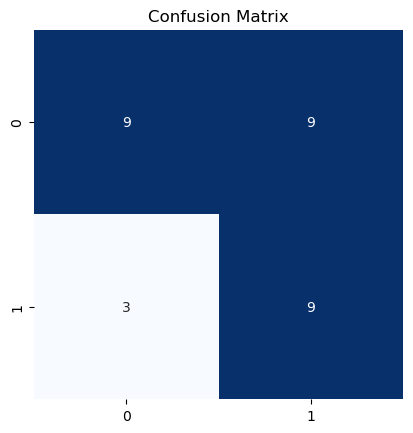

In [33]:
# For Decision Tree
c_m(y_test, y_pred_dt)

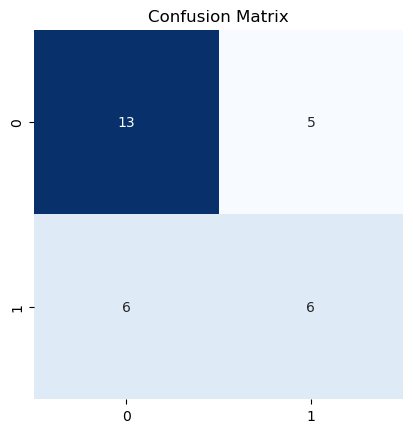

In [34]:
# For ANN
c_m(y_test, y_pred_ann)

In [35]:
# function to get scores in order to get results
def score(y_test,y_pred):
    print('Accuracy : ',metrics.accuracy_score(y_test, y_pred))
    print('Recall : ',metrics.recall_score(y_test, y_pred))
    print('Precision : ',metrics.precision_score(y_test, y_pred))
    print('F1 score : ',metrics.f1_score(y_test, y_pred))

In [36]:
# For Logistic Regression
score(y_test,y_pred_lr)

Accuracy :  0.5333333333333333
Recall :  0.5833333333333334
Precision :  0.4375
F1 score :  0.5


In [37]:
# For Random Forest
score(y_test,y_pred_rf)

Accuracy :  0.43333333333333335
Recall :  0.6666666666666666
Precision :  0.38095238095238093
F1 score :  0.4848484848484849


In [38]:
# For Decision Tree
score(y_test,y_pred_dt)

Accuracy :  0.6
Recall :  0.75
Precision :  0.5
F1 score :  0.6


In [39]:
# For ANN
score(y_test,y_pred_ann)

Accuracy :  0.6333333333333333
Recall :  0.5
Precision :  0.5454545454545454
F1 score :  0.5217391304347826


In [40]:
"""x = np.array(x_val)
y = np.array(y_val)
x, y"""

'x = np.array(x_val)\ny = np.array(y_val)\nx, y'

In [41]:
"""# Logistic Regression
# Cross-Validate
kf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification
    
oos_y_lr = []
oos_pred_lr = []
#print('For Linear Regression')
fold = 0
for train, test in kf.split(x):
    fold+=1
    #print(f"Fold #{fold}")
        
    x_train_lr = x[train]
    y_train_lr = y[train]
    x_test_lr = x[test]
    y_test_lr = y[test]
    
    model = LogisticRegression()
    model.fit(x_train_lr,y_train_lr)
    
    pred_lr = model.predict(x_test_lr)
    oos_y_lr.append(y_test_lr)
    oos_pred_lr.append(pred_lr)    """

'# Logistic Regression\n# Cross-Validate\nkf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification\n    \noos_y_lr = []\noos_pred_lr = []\n#print(\'For Linear Regression\')\nfold = 0\nfor train, test in kf.split(x):\n    fold+=1\n    #print(f"Fold #{fold}")\n        \n    x_train_lr = x[train]\n    y_train_lr = y[train]\n    x_test_lr = x[test]\n    y_test_lr = y[test]\n    \n    model = LogisticRegression()\n    model.fit(x_train_lr,y_train_lr)\n    \n    pred_lr = model.predict(x_test_lr)\n    oos_y_lr.append(y_test_lr)\n    oos_pred_lr.append(pred_lr)    '

In [42]:
"""# Build the oos prediction list and calculate the error.
oos_y_lr = np.concatenate(oos_y_lr)
oos_pred_lr = np.concatenate(oos_pred_lr)
print("Logistic Regression")
acc_score_lr = metrics.accuracy_score(oos_y_lr, oos_pred_lr)
precision_score_lr = metrics.precision_score(oos_y_lr, oos_pred_lr)
recall_score_lr = metrics.recall_score(oos_y_lr, oos_pred_lr)
f1_score_lr = metrics.f1_score(oos_y_lr, oos_pred_lr)
print(f"Fold score (Accuracy) : {acc_score_lr}")
print(f"Fold score (Precision) : {precision_score_lr}")
print(f"Fold score (Recall) : {recall_score_lr}")
print(f"Fold score (F1) : {f1_score_lr}")"""

'# Build the oos prediction list and calculate the error.\noos_y_lr = np.concatenate(oos_y_lr)\noos_pred_lr = np.concatenate(oos_pred_lr)\nprint("Logistic Regression")\nacc_score_lr = metrics.accuracy_score(oos_y_lr, oos_pred_lr)\nprecision_score_lr = metrics.precision_score(oos_y_lr, oos_pred_lr)\nrecall_score_lr = metrics.recall_score(oos_y_lr, oos_pred_lr)\nf1_score_lr = metrics.f1_score(oos_y_lr, oos_pred_lr)\nprint(f"Fold score (Accuracy) : {acc_score_lr}")\nprint(f"Fold score (Precision) : {precision_score_lr}")\nprint(f"Fold score (Recall) : {recall_score_lr}")\nprint(f"Fold score (F1) : {f1_score_lr}")'

In [43]:
"""# Random Forest
# Cross-Validate
kf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification
    
oos_y_rf = []
oos_pred_rf = []
fold = 0
for train, test in kf.split(x):
    fold+=1
    #print(f"Fold #{fold}")
        
    x_train_rf = x[train]
    y_train_rf = y[train]
    x_test_rf = x[test]
    y_test_rf = y[test]
    
    model = RandomForestClassifier(n_estimators = 250)
    model.fit(x_train_rf,y_train_rf)
    
    pred_rf = model.predict(x_test_rf)
    oos_y_rf.append(y_test_rf)
    oos_pred_rf.append(pred_rf)    """

'# Random Forest\n# Cross-Validate\nkf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification\n    \noos_y_rf = []\noos_pred_rf = []\nfold = 0\nfor train, test in kf.split(x):\n    fold+=1\n    #print(f"Fold #{fold}")\n        \n    x_train_rf = x[train]\n    y_train_rf = y[train]\n    x_test_rf = x[test]\n    y_test_rf = y[test]\n    \n    model = RandomForestClassifier(n_estimators = 250)\n    model.fit(x_train_rf,y_train_rf)\n    \n    pred_rf = model.predict(x_test_rf)\n    oos_y_rf.append(y_test_rf)\n    oos_pred_rf.append(pred_rf)    '

In [44]:
"""# Build the oos prediction list and calculate the error.
oos_y_rf = np.concatenate(oos_y_rf)
oos_pred_rf = np.concatenate(oos_pred_rf)
print("Random Forest")
acc_score_rf = metrics.accuracy_score(oos_y_rf, oos_pred_rf)
precision_score_rf = metrics.precision_score(oos_y_rf, oos_pred_rf)
recall_score_rf = metrics.recall_score(oos_y_rf, oos_pred_rf)
f1_score_rf = metrics.f1_score(oos_y_rf, oos_pred_rf)
print(f"Fold score (Accuracy) : {acc_score_rf}")
print(f"Fold score (Precision) : {precision_score_rf}")
print(f"Fold score (Recall) : {recall_score_rf}")
print(f"Fold score (F1) : {f1_score_rf}")"""

'# Build the oos prediction list and calculate the error.\noos_y_rf = np.concatenate(oos_y_rf)\noos_pred_rf = np.concatenate(oos_pred_rf)\nprint("Random Forest")\nacc_score_rf = metrics.accuracy_score(oos_y_rf, oos_pred_rf)\nprecision_score_rf = metrics.precision_score(oos_y_rf, oos_pred_rf)\nrecall_score_rf = metrics.recall_score(oos_y_rf, oos_pred_rf)\nf1_score_rf = metrics.f1_score(oos_y_rf, oos_pred_rf)\nprint(f"Fold score (Accuracy) : {acc_score_rf}")\nprint(f"Fold score (Precision) : {precision_score_rf}")\nprint(f"Fold score (Recall) : {recall_score_rf}")\nprint(f"Fold score (F1) : {f1_score_rf}")'

In [45]:
"""# Decision Tree
# Cross-Validate
kf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification
    
oos_y_dt = []
oos_pred_dt = []

fold = 0
for train, test in kf.split(x):
    fold+=1
    #print(f"Fold #{fold}")
        
    x_train_dt = x[train]
    y_train_dt = y[train]
    x_test_dt = x[test]
    y_test_dt = y[test]
    
    model = tree.DecisionTreeClassifier()
    model.fit(x_train_dt,y_train_dt)
    
    pred_dt = model.predict(x_test_dt)
    oos_y_dt.append(y_test_dt)
    oos_pred_dt.append(pred_dt)    """

'# Decision Tree\n# Cross-Validate\nkf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification\n    \noos_y_dt = []\noos_pred_dt = []\n\nfold = 0\nfor train, test in kf.split(x):\n    fold+=1\n    #print(f"Fold #{fold}")\n        \n    x_train_dt = x[train]\n    y_train_dt = y[train]\n    x_test_dt = x[test]\n    y_test_dt = y[test]\n    \n    model = tree.DecisionTreeClassifier()\n    model.fit(x_train_dt,y_train_dt)\n    \n    pred_dt = model.predict(x_test_dt)\n    oos_y_dt.append(y_test_dt)\n    oos_pred_dt.append(pred_dt)    '

In [46]:
"""# Build the oos prediction list and calculate the error.
oos_y_dt = np.concatenate(oos_y_dt)
oos_pred_dt = np.concatenate(oos_pred_dt)
print("Decision Tree")
acc_score_dt = metrics.accuracy_score(oos_y_dt, oos_pred_dt)
precision_score_dt = metrics.precision_score(oos_y_dt, oos_pred_dt)
recall_score_dt = metrics.recall_score(oos_y_dt, oos_pred_dt)
f1_score_dt = metrics.f1_score(oos_y_dt, oos_pred_dt)
print(f"Fold score (Accuracy) : {acc_score_dt}")
print(f"Fold score (Precision) : {precision_score_dt}")
print(f"Fold score (Recall) : {recall_score_dt}")
print(f"Fold score (F1) : {f1_score_dt}")"""

'# Build the oos prediction list and calculate the error.\noos_y_dt = np.concatenate(oos_y_dt)\noos_pred_dt = np.concatenate(oos_pred_dt)\nprint("Decision Tree")\nacc_score_dt = metrics.accuracy_score(oos_y_dt, oos_pred_dt)\nprecision_score_dt = metrics.precision_score(oos_y_dt, oos_pred_dt)\nrecall_score_dt = metrics.recall_score(oos_y_dt, oos_pred_dt)\nf1_score_dt = metrics.f1_score(oos_y_dt, oos_pred_dt)\nprint(f"Fold score (Accuracy) : {acc_score_dt}")\nprint(f"Fold score (Precision) : {precision_score_dt}")\nprint(f"Fold score (Recall) : {recall_score_dt}")\nprint(f"Fold score (F1) : {f1_score_dt}")'

In [47]:
"""# ANN
# Cross-Validate
kf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification
    
oos_y_ann = []
oos_pred_ann = []

fold = 0
for train, test in kf.split(x):
    fold+=1
    #print(f"Fold #{fold}")
        
    x_train_ann = x[train]
    y_train_ann = y[train]
    x_test_ann = x[test]
    y_test_ann = y[test]
    
    model = Sequential()
    model.add(Dense(30, input_dim=12,kernel_initializer = 'uniform', activation = 'softsign'))
    model.add(Dense(15,kernel_initializer = 'uniform', activation = 'sigmoid'))
    model.add(Dense(20,kernel_initializer = 'uniform', activation = 'softplus'))
    model.add(Dense(1,kernel_initializer = 'uniform', activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_train_ann, y_train_ann, epochs=100, verbose=0,validation_split=0.2)
    
    pred_ann = model.predict(x_test_ann)
    tmp = sum(pred_ann) / len(pred_ann)
    rect_answer = []
    for i in pred_ann:
        if i < tmp:
            rect_answer.append(0)
        else:
            rect_answer.append(1)
    #print(rect_answer)
    pred_ann = rect_answer
    oos_y_ann.append(y_test_ann)
    oos_pred_ann.append(pred_ann)    """

'# ANN\n# Cross-Validate\nkf = KFold(5, shuffle=True, random_state=0) # Use for KFold classification\n    \noos_y_ann = []\noos_pred_ann = []\n\nfold = 0\nfor train, test in kf.split(x):\n    fold+=1\n    #print(f"Fold #{fold}")\n        \n    x_train_ann = x[train]\n    y_train_ann = y[train]\n    x_test_ann = x[test]\n    y_test_ann = y[test]\n    \n    model = Sequential()\n    model.add(Dense(30, input_dim=12,kernel_initializer = \'uniform\', activation = \'softsign\'))\n    model.add(Dense(15,kernel_initializer = \'uniform\', activation = \'sigmoid\'))\n    model.add(Dense(20,kernel_initializer = \'uniform\', activation = \'softplus\'))\n    model.add(Dense(1,kernel_initializer = \'uniform\', activation = \'sigmoid\'))\n    model.compile(loss=\'binary_crossentropy\', optimizer=\'adam\', metrics=[\'accuracy\'])\n    model.fit(x_train_ann, y_train_ann, epochs=100, verbose=0,validation_split=0.2)\n    \n    pred_ann = model.predict(x_test_ann)\n    tmp = sum(pred_ann) / len(pred_ann)

In [48]:
"""# Build the oos prediction list and calculate the error.
oos_y_ann = np.concatenate(oos_y_ann)
oos_pred_ann = np.concatenate(oos_pred_ann)
print("ANN")
acc_score_ann = metrics.accuracy_score(oos_y_ann, oos_pred_ann)
precision_score_ann = metrics.precision_score(oos_y_ann, oos_pred_ann)
recall_score_ann = metrics.recall_score(oos_y_ann, oos_pred_ann)
f1_score_ann = metrics.f1_score(oos_y_ann, oos_pred_ann)
print(f"Fold score (Accuracy) : {acc_score_ann}")
print(f"Fold score (Precision) : {precision_score_ann}")
print(f"Fold score (Recall) : {recall_score_ann}")
print(f"Fold score (F1) : {f1_score_ann}")"""

'# Build the oos prediction list and calculate the error.\noos_y_ann = np.concatenate(oos_y_ann)\noos_pred_ann = np.concatenate(oos_pred_ann)\nprint("ANN")\nacc_score_ann = metrics.accuracy_score(oos_y_ann, oos_pred_ann)\nprecision_score_ann = metrics.precision_score(oos_y_ann, oos_pred_ann)\nrecall_score_ann = metrics.recall_score(oos_y_ann, oos_pred_ann)\nf1_score_ann = metrics.f1_score(oos_y_ann, oos_pred_ann)\nprint(f"Fold score (Accuracy) : {acc_score_ann}")\nprint(f"Fold score (Precision) : {precision_score_ann}")\nprint(f"Fold score (Recall) : {recall_score_ann}")\nprint(f"Fold score (F1) : {f1_score_ann}")'